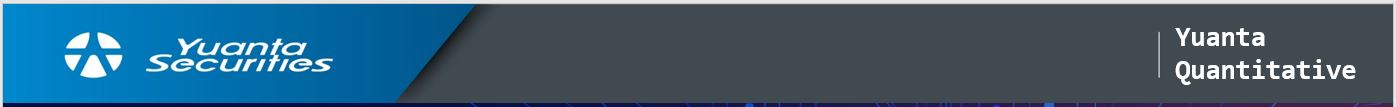

<p style="text-align: center;"><strong><span style="font-size: 20px;">Contents</span></strong></p>
<p style="text-align: center;"><span style="font-size: 20px;">What is Algo Trading?</span></p>
<p style="text-align: center;"><span style="font-size: 20px;">Model Development Steps</span></p>
<p style="text-align: center;"><span style="font-size: 20px;">Real Data from yahoofinance</span></p>
<p style="text-align: center;"><span style="font-size: 20px;">In/Out sample back-testing</span></p>
<p><br></p>
<p><br></p>
<p><br></p>
<p><strong><span style="font-size: 20px;"><br></span></strong></p>
<p><br></p>

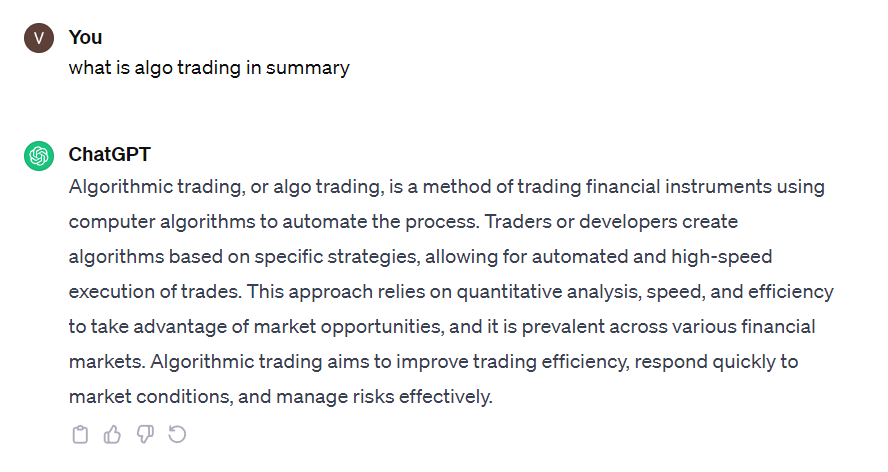

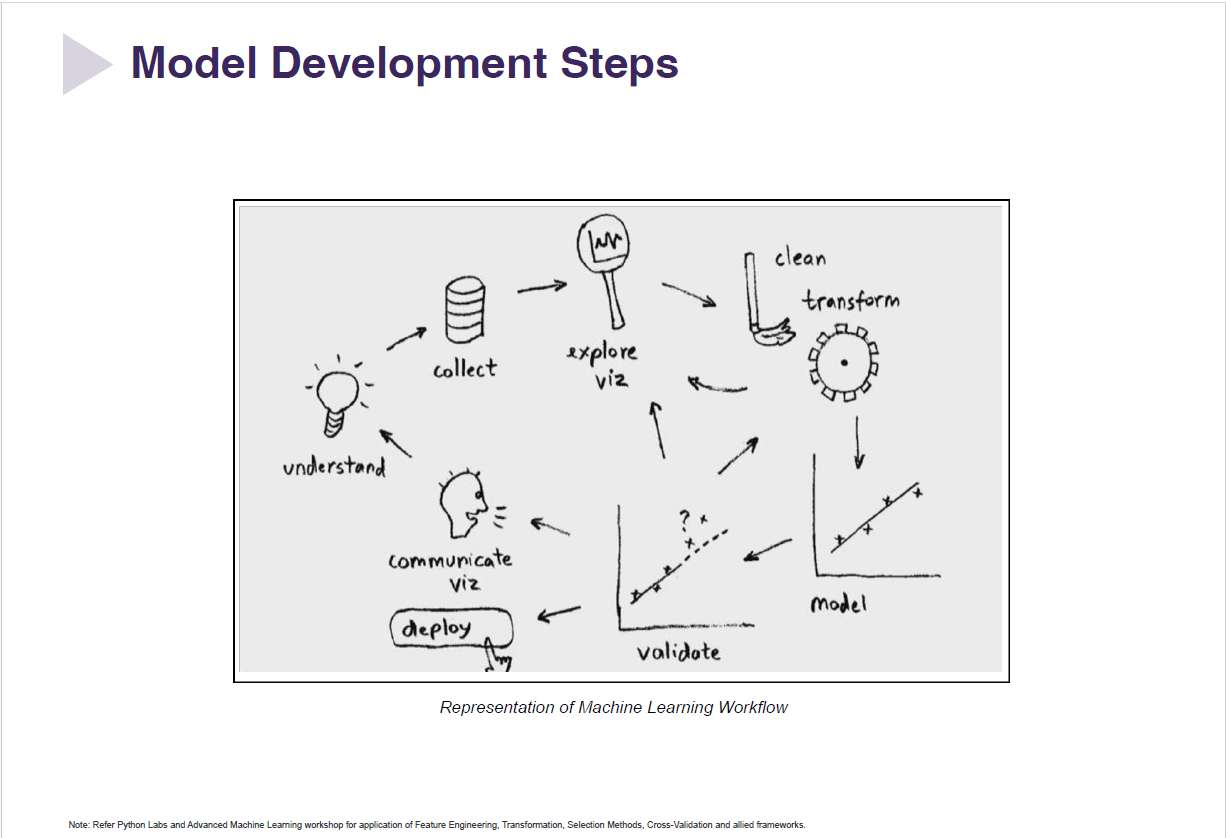

In [5]:
# Base Libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score

# Classifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report 
#confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_curve, plot_roc_curve
#plot_confusion_matrix,

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


#for technical indicator
import pandas_ta as ta

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\HP Victus 16\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)
#https://github.com/santosjorge/cufflinks

import seaborn as sns
import plotly.graph_objs as go  

In [ ]:
import yfinance as yf

# download dataframe
df1 = yf.download('^SET.BK', start='2010-01-01', end='2023-12-31',)
df1.to_csv('set.bk.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df1 = pd.read_csv('set.bk.csv').set_index('Date')

In [ ]:
#explain about total return + show data from eikon
df1

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   736.659973   737.140015   725.650024   732.280029   732.280029   
2010-01-05   737.380005   740.859985   730.799988   732.109985   732.109985   
2010-01-06   734.729980   737.119995   732.659973   735.729980   735.729980   
2010-01-07   738.770020   740.909973   733.750000   734.630005   734.630005   
2010-01-08   736.289978   740.909973   736.030029   738.960022   738.960022   
...                 ...          ...          ...          ...          ...   
2023-12-21  1394.910034  1407.869995  1394.280029  1404.839966  1404.839966   
2023-12-22  1407.390015  1407.569946  1397.930054  1405.089966  1405.089966   
2023-12-26  1413.449951  1413.449951  1413.449951  1413.449951  1413.449951   
2023-12-27  1415.060059  1416.099976  1407.619995  1410.430054  1410.430054   
2023-12-28  1410.869995  1418.979980  1410.869995  1415.849976  1415.849976   

             Volume  
Date                 
2010-01-04  2368700  
2010-01-05  3028800  
2010-01-06  3696400  
2010-01-07  3693600  
2010-01-08  2693600  
...             ...  
2023-12-21  3444400  
2023-12-22  2643700  
2023-12-26        0  
2023-12-27  2746000  
2023-12-28  3250100  

[3402 rows x 6 columns]

In [ ]:
#multiple tickers
list_of_stock = ['PTT.BK','AOT.BK','DELTA.BK','RATCH.BK', 'EGCO.BK', 'PTTEP.BK']
df2 = yf.download(list_of_stock, start='2000-01-01', end='2022-12-31',)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
#using cufflink to plot
df2.iplot(kind='line')

In [ ]:
df3 = df2.pct_change()

<AxesSubplot:>

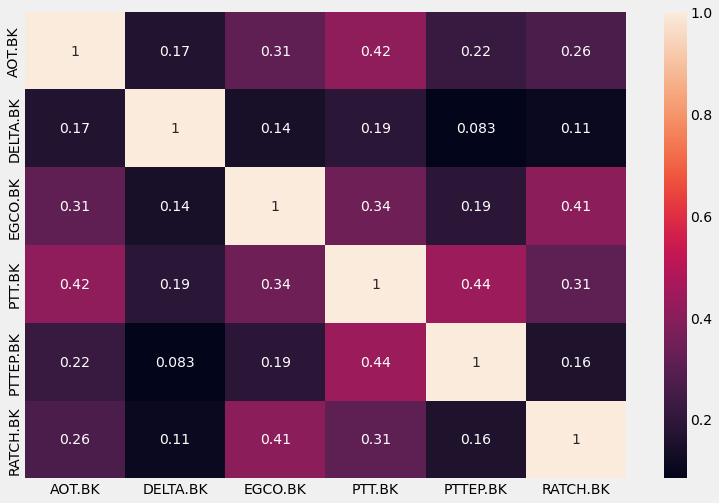

In [ ]:
#correlation matrix
#https://www.simplypsychology.org/correlation.html
sns.heatmap(df3.corr(), annot=True)

In [ ]:
df3.describe().T

count      mean       std       min       25%  50%       75%  \
AOT.BK    4620.0  0.000933  0.020610 -0.150538 -0.008772  0.0  0.009950   
DELTA.BK  5712.0  0.001010  0.040765 -1.837552 -0.010989  0.0  0.011429   
EGCO.BK   5712.0  0.000594  0.015724 -0.145299 -0.006993  0.0  0.007462   
PTT.BK    5210.0  0.000793  0.019659 -0.253333 -0.008982  0.0  0.009638   
PTTEP.BK  5712.0  0.000889  0.032122 -0.298122 -0.009091  0.0  0.009404   
RATCH.BK  5494.0  0.000495  0.015008 -0.152838 -0.006163  0.0  0.006410   

               max  
AOT.BK    0.183406  
DELTA.BK  1.288976  
EGCO.BK   0.125926  
PTT.BK    0.161290  
PTTEP.BK  1.795180  
RATCH.BK  0.245614

In [ ]:
df3.iplot(kind='histogram', subplots=True)

In [ ]:
layout = go.Layout(
        xaxis=dict(
            range=[-0.2, 0.2]
        )
    )

df3.iplot(kind='histogram', layout = layout)

In [ ]:
layout = go.Layout(
        yaxis=dict(
            range=[-0.2, 0.2]
        )
    )

df3.iplot(kind='box', layout=layout)

In [ ]:
#yearly volatility
print(df3.std() * np.sqrt(252) * 100)

AOT.BK      32.717199
DELTA.BK    64.712873
EGCO.BK     24.960952
PTT.BK      31.208405
PTTEP.BK    50.991897
RATCH.BK    23.825203
dtype: float64


# Starting to using model for predicting the next return

In [ ]:
#back to set data, using this data for predicting the tomorrow return
df = df1.copy()
df['Adj Close'].iplot(kind='line')


In [ ]:
df['Forward Returns'] = np.log(df['Adj Close']).diff().shift(-1)

In [ ]:
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   736.659973   737.140015   725.650024   732.280029   732.280029   
2010-01-05   737.380005   740.859985   730.799988   732.109985   732.109985   
2010-01-06   734.729980   737.119995   732.659973   735.729980   735.729980   
2010-01-07   738.770020   740.909973   733.750000   734.630005   734.630005   
2010-01-08   736.289978   740.909973   736.030029   738.960022   738.960022   
...                 ...          ...          ...          ...          ...   
2023-12-21  1394.910034  1407.869995  1394.280029  1404.839966  1404.839966   
2023-12-22  1407.390015  1407.569946  1397.930054  1405.089966  1405.089966   
2023-12-26  1413.449951  1413.449951  1413.449951  1413.449951  1413.449951   
2023-12-27  1415.060059  1416.099976  1407.619995  1410.430054  1410.430054   
2023-12-28  1410.869995  1418.979980  1410.869995  1415.849976  1415.849976   

             Volume  Forward Returns  
Date                                  
2010-01-04  2368700        -0.000232  
2010-01-05  3028800         0.004932  
2010-01-06  3696400        -0.001496  
2010-01-07  3693600         0.005877  
2010-01-08  2693600         0.010754  
...             ...              ...  
2023-12-21  3444400         0.000178  
2023-12-22  2643700         0.005932  
2023-12-26        0        -0.002139  
2023-12-27  2746000         0.003835  
2023-12-28  3250100              NaN  

[3402 rows x 7 columns]

In [ ]:
df.dropna(inplace=True)
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   736.659973   737.140015   725.650024   732.280029   732.280029   
2010-01-05   737.380005   740.859985   730.799988   732.109985   732.109985   
2010-01-06   734.729980   737.119995   732.659973   735.729980   735.729980   
2010-01-07   738.770020   740.909973   733.750000   734.630005   734.630005   
2010-01-08   736.289978   740.909973   736.030029   738.960022   738.960022   
...                 ...          ...          ...          ...          ...   
2023-12-20  1398.010010  1406.400024  1395.189941  1400.369995  1400.369995   
2023-12-21  1394.910034  1407.869995  1394.280029  1404.839966  1404.839966   
2023-12-22  1407.390015  1407.569946  1397.930054  1405.089966  1405.089966   
2023-12-26  1413.449951  1413.449951  1413.449951  1413.449951  1413.449951   
2023-12-27  1415.060059  1416.099976  1407.619995  1410.430054  1410.430054   

             Volume  Forward Returns  
Date                                  
2010-01-04  2368700        -0.000232  
2010-01-05  3028800         0.004932  
2010-01-06  3696400        -0.001496  
2010-01-07  3693600         0.005877  
2010-01-08  2693600         0.010754  
...             ...              ...  
2023-12-20  3656100         0.003187  
2023-12-21  3444400         0.000178  
2023-12-22  2643700         0.005932  
2023-12-26        0        -0.002139  
2023-12-27  2746000         0.003835  

[3401 rows x 7 columns]

In [ ]:
# Descriptive statistics
df.describe()

Open         High          Low        Close    Adj Close  \
count  3401.000000  3401.000000  3401.000000  3401.000000  3401.000000   
mean   1426.465456  1432.927713  1418.290708  1425.487818  1425.487818   
std     252.399438   252.314305   251.936095   251.920112   251.920112   
min     685.010010   688.140015   679.450012   685.890015   685.890015   
25%    1297.229980  1303.719971  1291.359985  1297.390015  1297.390015   
50%    1509.790039  1517.079956  1501.300049  1509.839966  1509.839966   
75%    1606.060059  1615.219971  1597.030029  1605.959961  1605.959961   
max    1843.300049  1852.510010  1831.150024  1838.959961  1838.959961   

             Volume  Forward Returns  
count  3.401000e+03      3401.000000  
mean   8.637172e+06         0.000194  
std    5.254916e+06         0.010091  
min    0.000000e+00        -0.114282  
25%    4.541800e+06        -0.004453  
50%    7.764400e+06         0.000530  
75%    1.131040e+07         0.005202  
max    5.294150e+07         0.076531

In [ ]:
# Check for missing values
df.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Forward Returns    0
dtype: int64

In [ ]:
# Predictors (Feature Engineering)
df['O-C'] = df.Open - df.Close
df['H-L'] = df.High - df.Low

X = df[['O-C', 'H-L']].values
X[:5]

array([[ 4.37994385, 11.48999023],
       [ 5.27001953, 10.05999756],
       [-1.        ,  4.46002197],
       [ 4.14001465,  7.15997314],
       [-2.67004395,  4.87994385]])

In [ ]:
# Target
y = np.where(df['Forward Returns']>=0, 1,0)
y

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
# Value counts for class 1 and 0
pd.Series(y).value_counts()

1    1818
0    1583
dtype: int64

In [ ]:
# Splitting the datasets into training and testing data.
# Always keep shuffle = False for financial time series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 2652, 749


In [ ]:
# Scale and fit the model
pipe = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("classifier", KNeighborsClassifier())
]) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
# Target classes
class_names = pipe.classes_
class_names

array([0, 1])

In [ ]:
# Predicting the test dataset
y_pred = pipe.predict(X_test)

In [ ]:
acc_train = accuracy_score(y_train, pipe.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

In [ ]:
print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

Train Accuracy: 0.6912, Test Accuracy: 0.5434


In [ ]:
# predict
y_pred[:10]

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

<div class="jp-Cell jp-MarkdownCell jp-Notebook-cell" style="box-sizing: unset; -webkit-print-color-adjust: exact; padding: var(--jp-cell-padding); margin: 0px; border: none; outline: none; background: transparent; overflow: visible;">
    <div class="jp-Cell-inputWrapper" style="box-sizing: unset; -webkit-print-color-adjust: exact; display: flex; flex-direction: row; padding: 0px; margin: 0px; overflow: visible;">
        <div class="jp-InputArea jp-Cell-inputArea" style="box-sizing: unset; -webkit-print-color-adjust: exact; display: flex; flex-direction: row; overflow: hidden; flex: 1 1 auto;">
            <div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown" style="box-sizing: unset; -webkit-print-color-adjust: exact; color: var(--jp-content-font-color1); font-family: var(--jp-content-font-family); font-size: var(--jp-content-font-size1); line-height: var(--jp-content-line-height); padding-right: 20px; flex: 1 1 auto; margin-top: 0px; margin-bottom: 0px; padding-left: var(--jp-code-padding); overflow: auto;">
                <h2 style="box-sizing: unset; -webkit-print-color-adjust: exact; line-height: var(--jp-content-heading-line-height); font-weight: var(--jp-content-heading-font-weight); font-style: normal; margin-top: calc(0.5 * var(--jp-content-heading-margin-top)); margin-right: ; margin-bottom: calc(0.5 * var(--jp-content-heading-margin-bottom)); margin-left: ; font-size: var(--jp-content-font-size4);">Prediction Quality</h2>
            </div>
        </div>
    </div>
</div>
<div class="jp-Cell jp-MarkdownCell jp-Notebook-cell" style="box-sizing: unset; -webkit-print-color-adjust: exact; padding: var(--jp-cell-padding); margin: 0px; border: none; outline: none; background: transparent; overflow: visible;">
    <div class="jp-Cell-inputWrapper" style="box-sizing: unset; -webkit-print-color-adjust: exact; display: flex; flex-direction: row; padding: 0px; margin: 0px; overflow: visible;">
        <div class="jp-InputArea jp-Cell-inputArea" style="box-sizing: unset; -webkit-print-color-adjust: exact; display: flex; flex-direction: row; overflow: hidden; flex: 1 1 auto;">
            <div class="jp-InputPrompt jp-InputArea-prompt" style="box-sizing: unset; -webkit-print-color-adjust: exact; flex: 0 0 var(--jp-cell-prompt-width); color: var(--jp-cell-prompt-not-active-font-color); font-family: var(--jp-cell-prompt-font-family); padding: var(--jp-code-padding); letter-spacing: var(--jp-cell-prompt-letter-spacing); line-height: var(--jp-code-line-height); font-size: var(--jp-code-font-size); border: var(--jp-border-width) solid transparent; opacity: var(--jp-cell-prompt-not-active-opacity); text-align: right; white-space: nowrap; overflow: hidden; text-overflow: ellipsis; user-select: none; cursor: move; float: left;"><br></div>
            <div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown" style="box-sizing: unset; -webkit-print-color-adjust: exact; color: var(--jp-content-font-color1); font-family: var(--jp-content-font-family); font-size: var(--jp-content-font-size1); line-height: var(--jp-content-line-height); padding-right: 20px; flex: 1 1 auto; margin-top: 0px; margin-bottom: 0px; padding-left: var(--jp-code-padding); overflow: auto;">
                <h3 style="box-sizing: unset; -webkit-print-color-adjust: exact; line-height: var(--jp-content-heading-line-height); font-weight: var(--jp-content-heading-font-weight); font-style: normal; margin-top: calc(0.5 * var(--jp-content-heading-margin-top)); margin-right: ; margin-bottom: ; margin-left: ; font-size: var(--jp-content-font-size3);">Confusion Matrix</h3>
                <p style="box-sizing: unset; -webkit-print-color-adjust: exact; margin: 0px 0px 1em; text-align: left;">Confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true</p>
                <p style="box-sizing: unset; -webkit-print-color-adjust: exact; margin: 0px 0px 1em; text-align: left;">&nbsp;values are known.</p>
                <table style="box-sizing: unset; -webkit-print-color-adjust: exact; border-collapse: collapse; border-spacing: 0px; border: none; color: var(--jp-ui-font-color1); font-size: 12px; table-layout: fixed; margin-left: auto; margin-right: auto; margin-bottom: 1em;">
                    <thead style="box-sizing: unset; -webkit-print-color-adjust: exact; border-bottom: var(--jp-border-width) solid var(--jp-border-color1); vertical-align: bottom;">
                        <tr style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;">
                            <th style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; font-weight: bold; text-align: left;">Outcome</th>
                            <th style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; font-weight: bold; text-align: left;">Position<a href="#fn1" style="box-sizing: unset; -webkit-print-color-adjust: exact; color: var(--jp-content-link-color); text-decoration: none;"><sup style="box-sizing: unset; -webkit-print-color-adjust: exact;">1</sup></a></th>
                        </tr>
                    </thead>
                    <tbody style="box-sizing: unset; -webkit-print-color-adjust: exact;">
                        <tr style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: var(--jp-layout-color0);">
                            <td style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; text-align: left;">True Negative</td>
                            <td style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; text-align: left;">upper-left</td>
                        </tr>
                        <tr style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: var(--jp-rendermime-table-row-background);">
                            <td style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; text-align: left;">False Negative</td>
                            <td style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; text-align: left;">lower-left</td>
                        </tr>
                        <tr style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: var(--jp-layout-color0);">
                            <td style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; text-align: left;">False Positive</td>
                            <td style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; text-align: left;">upper-right</td>
                        </tr>
                        <tr style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: var(--jp-rendermime-table-row-background);">
                            <td style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; text-align: left;">True Positive</td>
                            <td style="box-sizing: unset; -webkit-print-color-adjust: exact; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; text-align: left;">lower-right</td>
                        </tr>
                    </tbody>
                </table>
                <p style="box-sizing: unset; -webkit-print-color-adjust: exact; margin: 0px 0px 1em; text-align: left;"><strong style="box-sizing: unset; -webkit-print-color-adjust: exact; font-weight: bold;">True Positive</strong> is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class.</p>
                <p style="box-sizing: unset; -webkit-print-color-adjust: exact; margin: 0px 0px 1em; text-align: left;"><strong style="box-sizing: unset; -webkit-print-color-adjust: exact; font-weight: bold;">False Positive</strong> is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.</p>
                <p style="box-sizing: unset; -webkit-print-color-adjust: exact; margin: 0px 0px 0.5em; text-align: left;"><em style="box-sizing: unset; -webkit-print-color-adjust: exact; font-style: italic;">Note</em>: In a binary classification task, the terms &lsquo;&rsquo;positive&rsquo;&rsquo; and &lsquo;&rsquo;negative&rsquo;&rsquo; refer to the classifier&rsquo;s prediction, and the terms &lsquo;&rsquo;true&rsquo;&rsquo; and &lsquo;&rsquo;false&rsquo;&rsquo; refer to whether that prediction corresponds to the external judgment (sometimes known as the &lsquo;&rsquo;observation&rsquo;&rsquo;) and the axes can be flipped. Refer <a href="https://urldefense.com/v3/__https://scikit-learn.org/stable/modules/model_evaluation.html*binary-classification__;Iw!!KGvANbslH1YjwA!9DIBdB-9UmrrOMFu7sB3cNyyA-7lOo-C14594a6VGNnK8orabH1xdkVAoCAvaIKvLf8EVQmRFypxX6hanpft05qDD2K99TQaMS8ZnS0$" style="box-sizing: unset; -webkit-print-color-adjust: exact; color: var(--jp-content-link-color); text-decoration: none;">Scikit-Learn Binary Classification</a> for further details.</p>
            </div>
        </div>
    </div>
</div>
<div class="jp-Cell jp-CodeCell jp-Notebook-cell   " style="box-sizing: unset; -webkit-print-color-adjust: exact; padding: var(--jp-cell-padding); margin: 0px; border: none; outline: none; background: transparent; overflow: visible;">
    <div class="jp-Cell-inputWrapper" style="box-sizing: unset; -webkit-print-color-adjust: exact; display: flex; flex-direction: row; padding: 0px; margin: 0px; overflow: visible;">
        <div class="jp-InputArea jp-Cell-inputArea" style="box-sizing: unset; -webkit-print-color-adjust: exact; display: flex; flex-direction: row; overflow: hidden; flex: 1 1 auto;">
            <div class="jp-InputPrompt jp-InputArea-prompt" style="box-sizing: unset; -webkit-print-color-adjust: exact; flex: 0 0 var(--jp-cell-prompt-width); color: var(--jp-cell-prompt-not-active-font-color); font-family: var(--jp-cell-prompt-font-family); padding: var(--jp-code-padding); letter-spacing: normal; line-height: var(--jp-code-line-height); font-size: var(--jp-code-font-size); border: var(--jp-border-width) solid transparent; opacity: var(--jp-cell-prompt-not-active-opacity); text-align: right; white-space: nowrap; overflow: hidden; text-overflow: ellipsis; user-select: none; cursor: move; float: left; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; orphans: 2; text-indent: 0px; text-transform: none; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial;"><br class="Apple-interchange-newline"></div>
            <div class="jp-CodeMirrorEditor jp-Editor jp-InputArea-editor" data-type="inline" style='box-sizing: unset; -webkit-print-color-adjust: exact; cursor: text; flex: 1 1 auto; overflow: hidden; border: var(--jp-border-width) solid var(--jp-cell-editor-border-color); border-radius: 0px; background: var(--jp-cell-editor-background); color: rgb(0, 0, 0); font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Helvetica, Arial, sans-serif, "Apple Color Emoji", "Segoe UI Emoji", "Segoe UI Symbol"; font-size: 14px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; white-space: normal; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial;'>
                <div class="CodeMirror cm-s-jupyter" style="box-sizing: unset; -webkit-print-color-adjust: exact; font-family: var(--jp-code-font-family); height: auto; color: var(--jp-content-font-color1); direction: ltr; position: relative; overflow: hidden; background: transparent; line-height: var(--jp-code-line-height); font-size: var(--jp-code-font-size); border: 0px; border-radius: 0px;"><br></div>
            </div>
        </div>
    </div>
</div>
<p><br></p>

In [ ]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

183 179 163 224


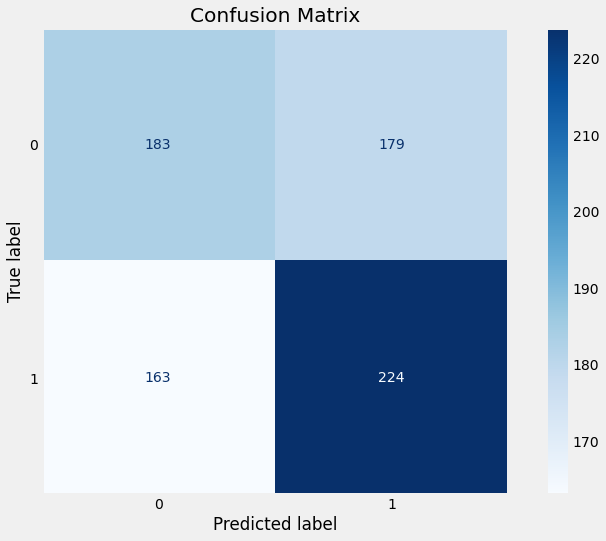

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       362
           1       0.56      0.58      0.57       387

    accuracy                           0.54       749
   macro avg       0.54      0.54      0.54       749
weighted avg       0.54      0.54      0.54       749



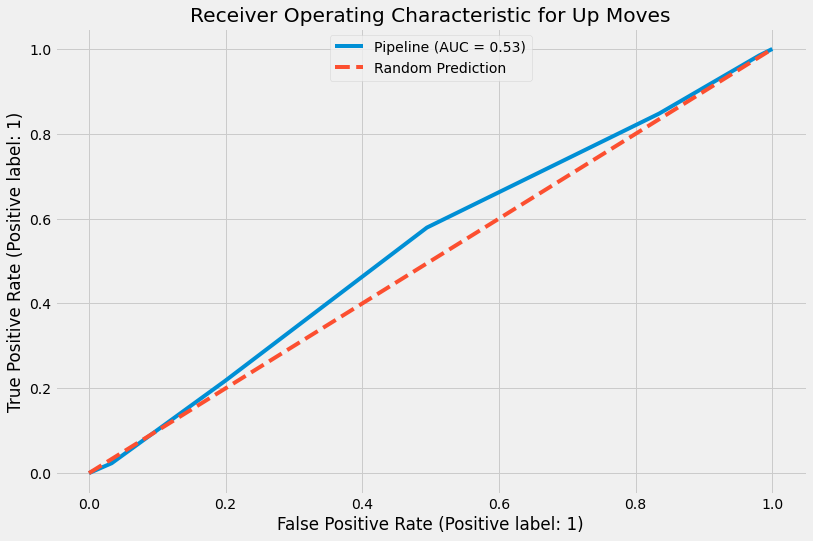

In [ ]:
# Random Prediction
r_prob = [0 for _ in range(len(y_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, r_prob, pos_label=1)

# Plot ROC Curve
plot_roc_curve(pipe, X_test, y_test)
plt.plot(r_fpr, r_tpr, linestyle='dashed', label='Random Prediction')
plt.title('Receiver Operating Characteristic for Up Moves')
plt.legend(loc=9)
plt.show()

<div class="jp-Cell jp-MarkdownCell jp-Notebook-cell" style="box-sizing: unset; -webkit-print-color-adjust: exact; padding: var(--jp-cell-padding); margin: 0px; border: none; outline: none; background: transparent; overflow: visible;">
    <div class="jp-Cell-inputWrapper" style="box-sizing: unset; -webkit-print-color-adjust: exact; display: flex; flex-direction: row; padding: 0px; margin: 0px; overflow: visible;">
        <div class="jp-InputArea jp-Cell-inputArea" style="box-sizing: unset; -webkit-print-color-adjust: exact; display: flex; flex-direction: row; overflow: hidden; flex: 1 1 auto;">
            <div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown" style="box-sizing: unset; -webkit-print-color-adjust: exact; color: var(--jp-content-font-color1); font-family: var(--jp-content-font-family); font-size: var(--jp-content-font-size1); line-height: var(--jp-content-line-height); padding-right: 20px; flex: 1 1 auto; margin-top: 0px; margin-bottom: 0px; padding-left: var(--jp-code-padding); overflow: auto;">
                <div style="text-align: start;color: rgb(0, 0, 0);font-size: 14px;border: none;">
                    <div>
                        <div>
                            <div style="color: var(--jp-content-font-color1);font-size: var(--jp-content-font-size1);">
                                <h2 style="font-size: var(--jp-content-font-size4);">Hyper-parameter Tuning</h2>
                            </div>
                        </div>
                    </div>
                </div>
                <div style="text-align: start;color: rgb(0, 0, 0);font-size: 14px;border: none;">
                    <div>
                        <div>
                            <div style="text-align: right;color: var(--jp-cell-prompt-not-active-font-color);font-size: var(--jp-code-font-size);border: var(--jp-border-width) solid transparent;"><br></div>
                            <div style="color: var(--jp-content-font-color1);font-size: var(--jp-content-font-size1);">
                                <p style="text-align: left;">Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. It is possible and recommended to search the hyper-parameter space for the best cross validation score. Any parameter provided when constructing an estimator may be optimized in this manner.</p>
                            </div>
                        </div>
                    </div>
                </div>
                <div style="text-align: start;color: rgb(0, 0, 0);font-size: 14px;border: none;">
                    <div>
                        <div>
                            <div style="text-align: right;color: var(--jp-cell-prompt-not-active-font-color);font-size: var(--jp-code-font-size);border: var(--jp-border-width) solid transparent;"><br></div>
                            <div style="color: var(--jp-content-font-color1);font-size: var(--jp-content-font-size1);">
                                <h3 style="font-size: var(--jp-content-font-size3);">Cross-validation of Time Series</h3>
                                <p style="text-align: left;">Time series data are sequential in nature and are characterised by the correlation between observations. Classical cross-validation techniques such as KFold assume the samples are independent and identically distributed, and would result in poor estimates when applied on time series data.</p>
                                <p style="text-align: left;">To preserve the order and have training set occur prior to the test set, we use <strong><strong>Forward Chaining</strong></strong> method in which the model is initially trained and tested with the same windows size. And, for each subsequent fold, the training window increases in size, encompassing both the previous training data and test data. The new test window once again follows the training window but stays the same length.</p>
                                <p style="text-align: left;">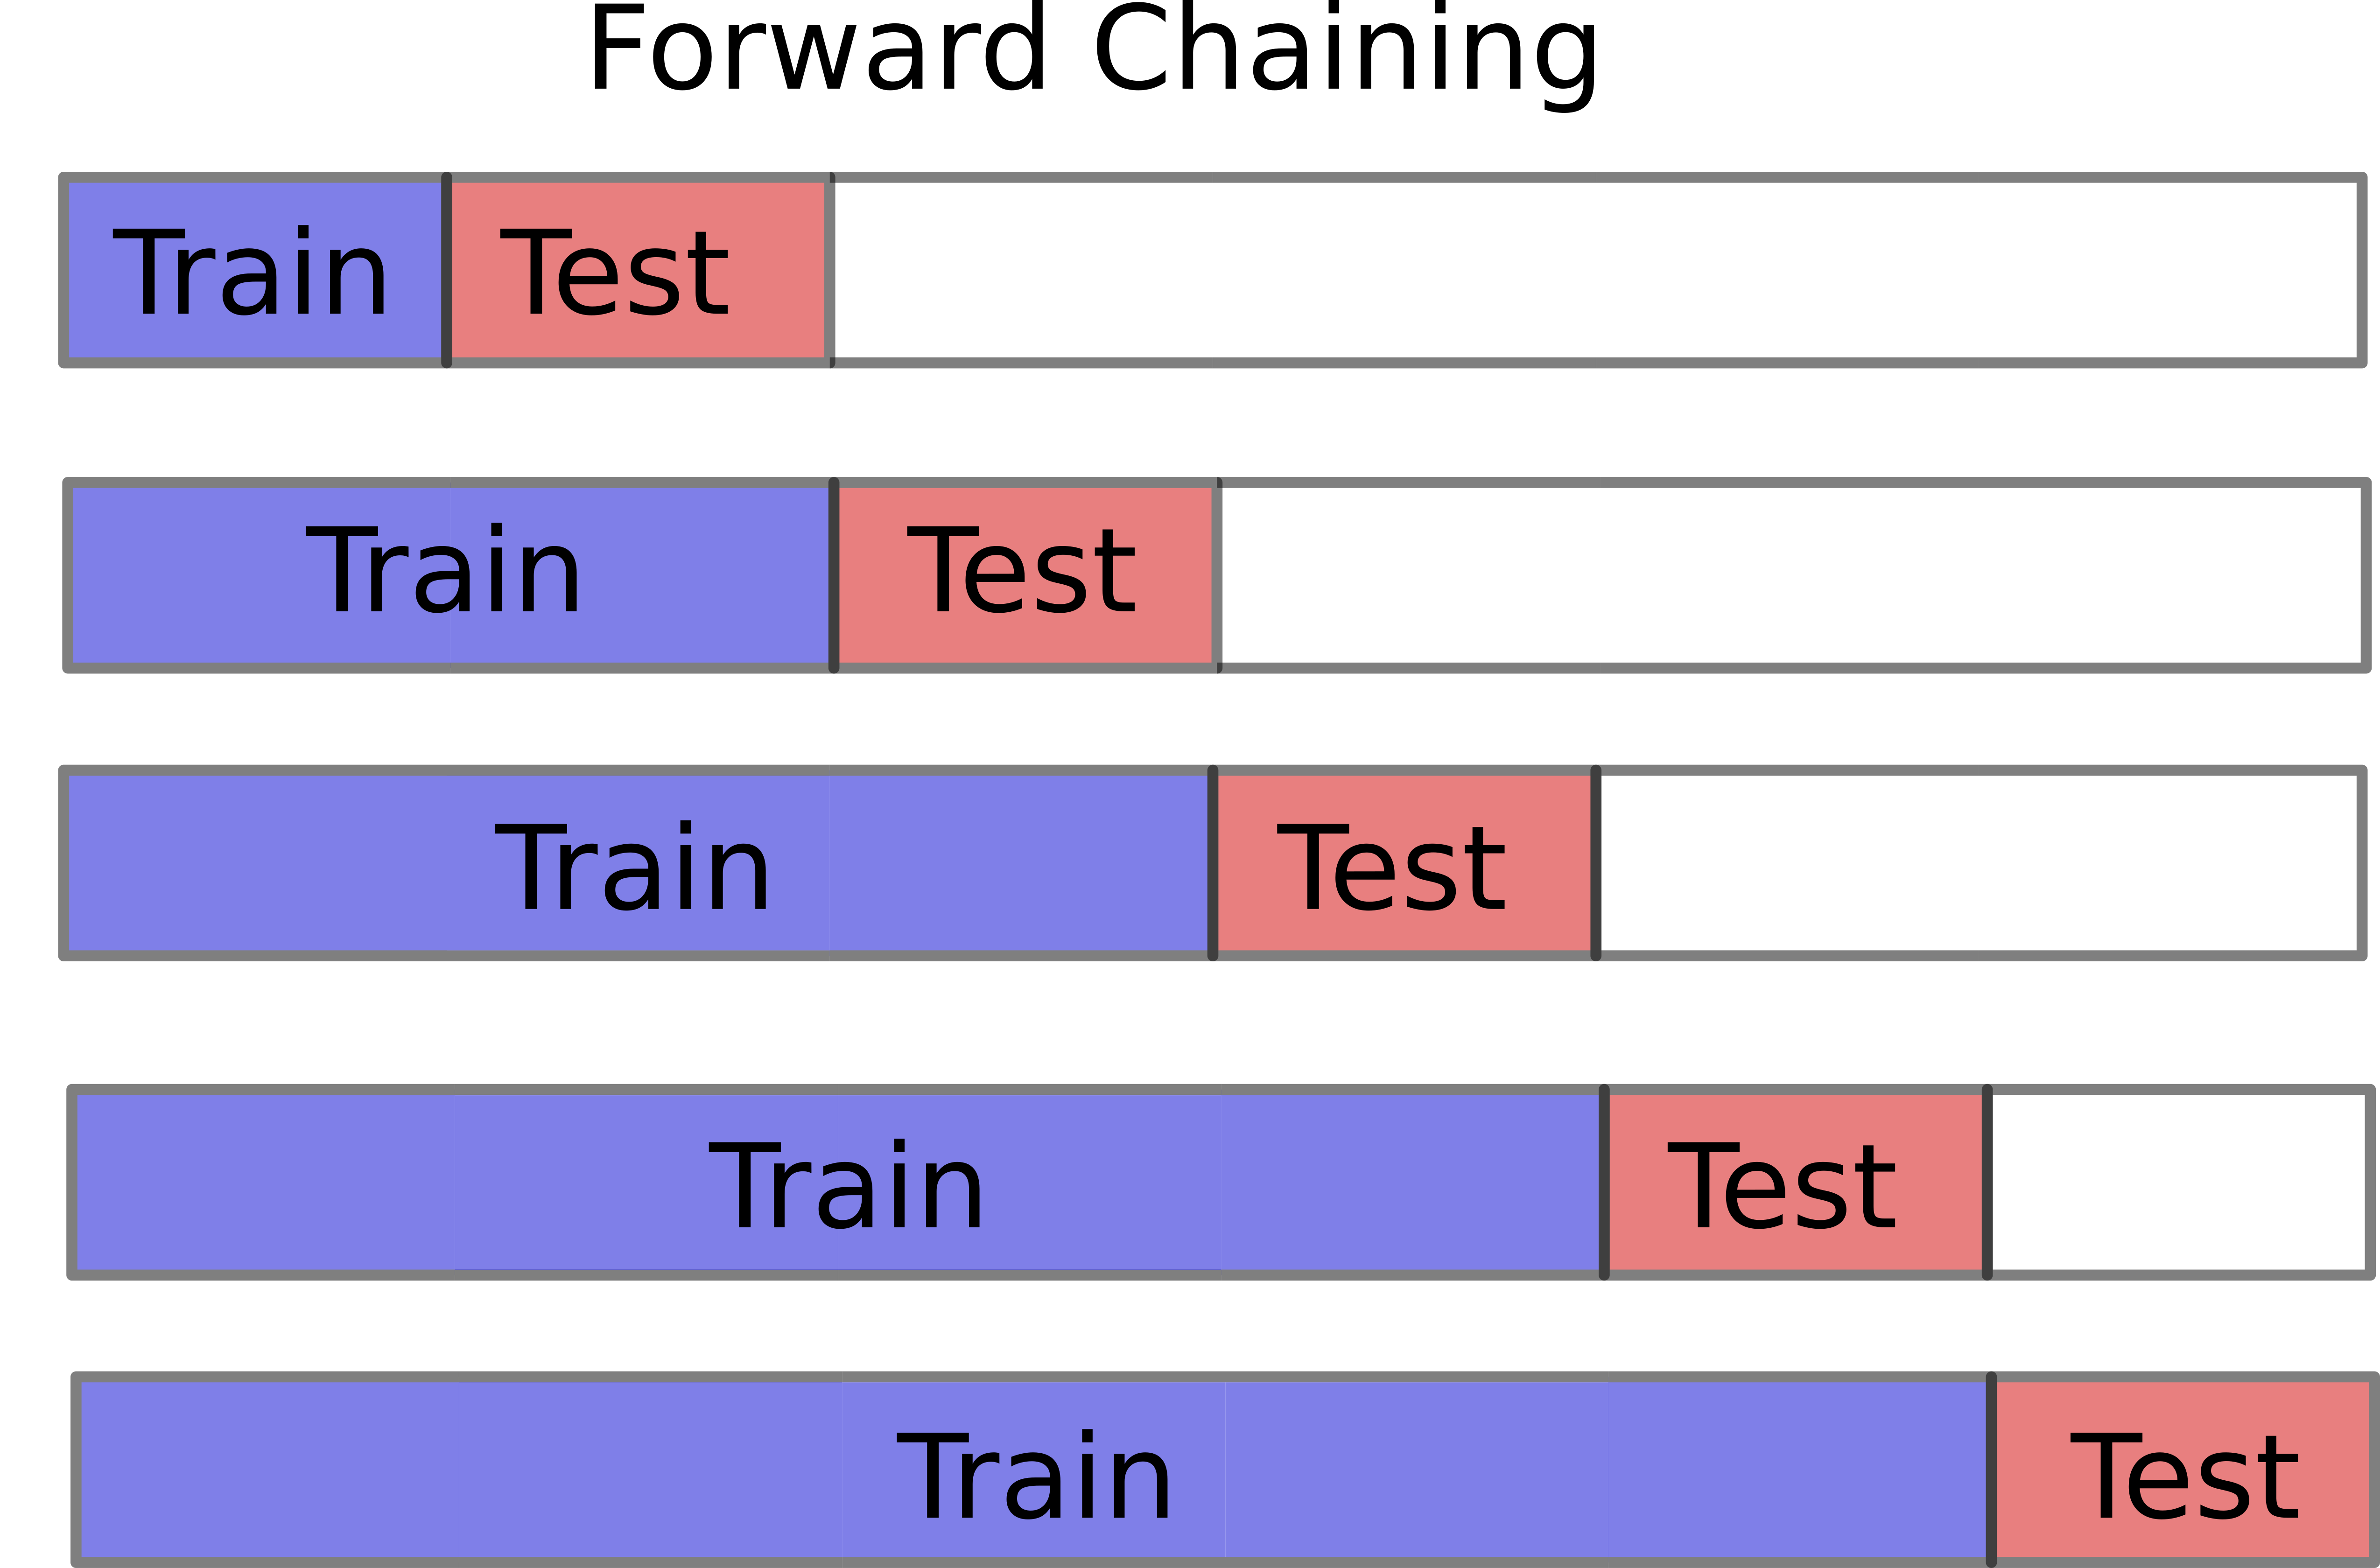</p>
                                <p style="text-align: left;">We will tune the hyperparameters to select the K-Best Neighbor by <strong><strong>TimeSeriesSplit</strong></strong> from scikit-learn. This is a forward chaining cross-validation method and is a variation from the KFold. In the kth split, it returns first k folds as train set and the (k+1)th fold as test set. Unlike standard cross-validation methods, successive training sets are supersets of those that come before them.</p>
                            </div>
                        </div>
                    </div>
                </div>
            </div>
        </div>
    </div>
</div>
<p><br></p>

In [ ]:
# First 3 split
tscv = TimeSeriesSplit(n_splits=3, gap=1)
for train, test in tscv.split(X):
    print(train, test)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5, gap=1)

In [ ]:
# Get parameters list
pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('classifier', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'classifier': KNeighborsClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 5,
 'classifier__p': 2,
 'classifier__weights': 'uniform'}

In [ ]:
# Perform Gridsearch and fit
param_grid = {"classifier__n_neighbors": np.arange(1,51,1)}

grid_search = GridSearchCV(pipe, param_grid, scoring='roc_auc', n_jobs=-1, cv=tscv, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=TimeSeriesSplit(gap=1, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='roc_auc', verbose=1)

In [ ]:
# Best Params
grid_search.best_params_

{'classifier__n_neighbors': 37}

In [ ]:
# Best Score
grid_search.best_score_

0.50328415316499

# Fit & Predict

In [ ]:
# Instantiate KNN model with search param
clf = KNeighborsClassifier(n_neighbors = grid_search.best_params_['classifier__n_neighbors'])

In [ ]:
# Fit the model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=37)

In [ ]:
# Predicting the test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Measure Accuracy
acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

In [ ]:
# Print Accuracy
print(f'\n Training Accuracy \t: {acc_train :0.4} \n Test Accuracy \t\t: {acc_test :0.4}')


 Training Accuracy 	: 0.5777 
 Test Accuracy 		: 0.5381


In [ ]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

137 225 121 266


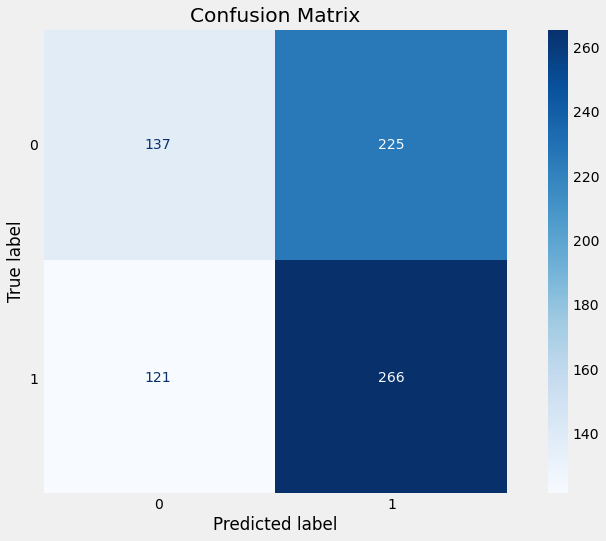

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

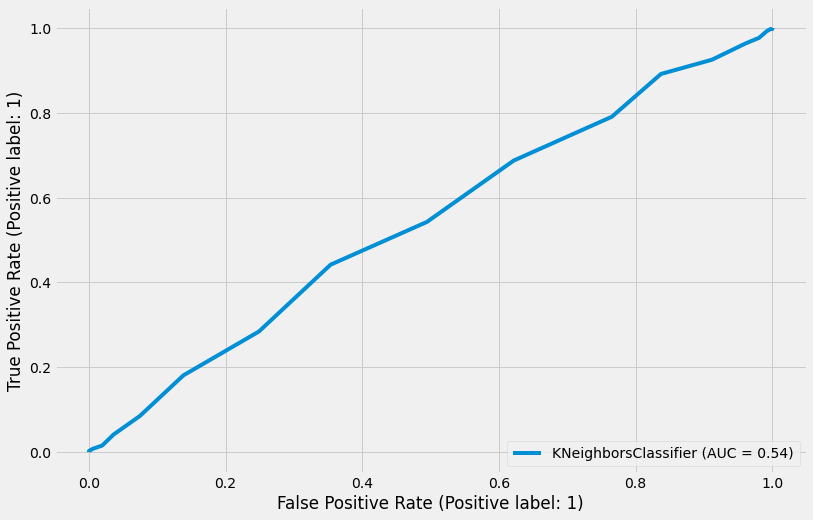

In [ ]:
# Plot ROC Curve
plot_roc_curve(clf, X_test, y_test);

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44       362
           1       0.54      0.69      0.61       387

    accuracy                           0.54       749
   macro avg       0.54      0.53      0.52       749
weighted avg       0.54      0.54      0.53       749



# Trading Strategy

In [ ]:
# Subsume into a new dataframe
df1 = df.copy()                      # df[-len(X_test)
df1['Signal'] = clf.predict(X)       # clf.predict(X_test)

In [ ]:
# Strategy Returns
df1['Strategy'] = df1['Forward Returns'] * df1['Signal'].fillna(0)

df1.index = pd.to_datetime(df1.index).tz_localize('utc')

In [ ]:
# Check the output
df1.tail(10)

Open         High          Low        Close  \
Date                                                                            
2023-12-13 00:00:00+00:00  1369.880005  1370.390015  1354.729980  1357.969971   
2023-12-14 00:00:00+00:00  1370.160034  1380.880005  1366.729980  1378.939941   
2023-12-15 00:00:00+00:00  1384.869995  1398.650024  1382.130005  1391.030029   
2023-12-18 00:00:00+00:00  1387.329956  1396.010010  1383.890015  1393.410034   
2023-12-19 00:00:00+00:00  1395.260010  1397.689941  1388.910034  1394.900024   
2023-12-20 00:00:00+00:00  1398.010010  1406.400024  1395.189941  1400.369995   
2023-12-21 00:00:00+00:00  1394.910034  1407.869995  1394.280029  1404.839966   
2023-12-22 00:00:00+00:00  1407.390015  1407.569946  1397.930054  1405.089966   
2023-12-26 00:00:00+00:00  1413.449951  1413.449951  1413.449951  1413.449951   
2023-12-27 00:00:00+00:00  1415.060059  1416.099976  1407.619995  1410.430054   

                             Adj Close   Volume  Forward Returns        O-C  \
Date                                                                          
2023-12-13 00:00:00+00:00  1357.969971  2903200         0.015324  11.910034   
2023-12-14 00:00:00+00:00  1378.939941  2530600         0.008729  -8.779907   
2023-12-15 00:00:00+00:00  1391.030029  3806500         0.001710  -6.160034   
2023-12-18 00:00:00+00:00  1393.410034  2538900         0.001069  -6.080078   
2023-12-19 00:00:00+00:00  1394.900024  3030000         0.003914   0.359985   
2023-12-20 00:00:00+00:00  1400.369995  3656100         0.003187  -2.359985   
2023-12-21 00:00:00+00:00  1404.839966  3444400         0.000178  -9.929932   
2023-12-22 00:00:00+00:00  1405.089966  2643700         0.005932   2.300049   
2023-12-26 00:00:00+00:00  1413.449951        0        -0.002139   0.000000   
2023-12-27 00:00:00+00:00  1410.430054  2746000         0.003835   4.630005   

                                 H-L  Signal  Strategy  
Date                                                    
2023-12-13 00:00:00+00:00  15.660034       1  0.015324  
2023-12-14 00:00:00+00:00  14.150024       1  0.008729  
2023-12-15 00:00:00+00:00  16.520020       1  0.001710  
2023-12-18 00:00:00+00:00  12.119995       0  0.000000  
2023-12-19 00:00:00+00:00   8.779907       0  0.000000  
2023-12-20 00:00:00+00:00  11.210083       1  0.003187  
2023-12-21 00:00:00+00:00  13.589966       1  0.000178  
2023-12-22 00:00:00+00:00   9.639893       0  0.000000  
2023-12-26 00:00:00+00:00   0.000000       1 -0.002139  
2023-12-27 00:00:00+00:00   8.479980       0  0.000000

In [ ]:
# Import pyfolio
import pyfolio as pf

In [ ]:
#find the first date of testing data
y = df1.tail(len(X_test)).head(1).index[0]
first_date_of_x_test = y.strftime('%Y-%m-%d')
print(first_date_of_x_test)

2020-11-18


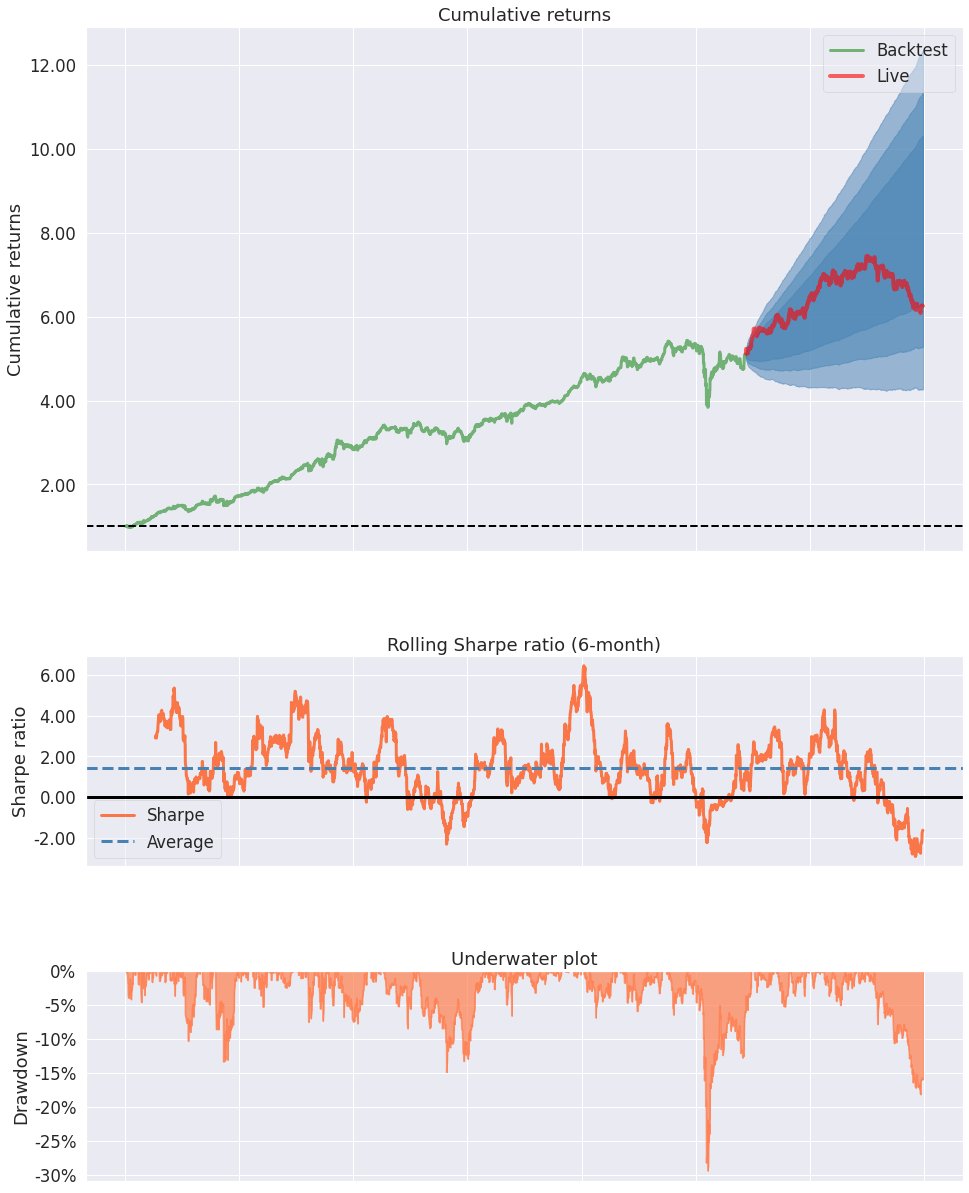

In [ ]:
# Live start date first_date_of_x_test

pf.create_simple_tear_sheet(df1['Strategy'], live_start_date=first_date_of_x_test)

<AxesSubplot:title={'center':'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

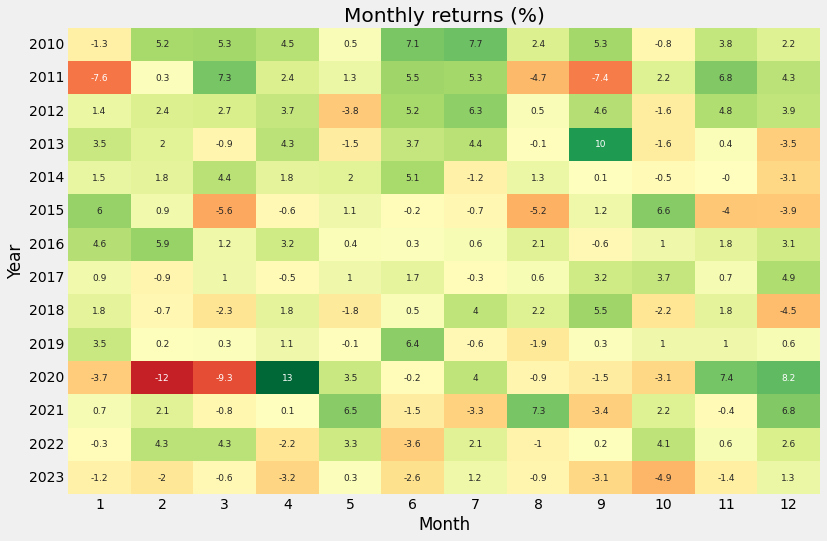

In [ ]:
pf.plot_monthly_returns_heatmap(df1['Strategy'])

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

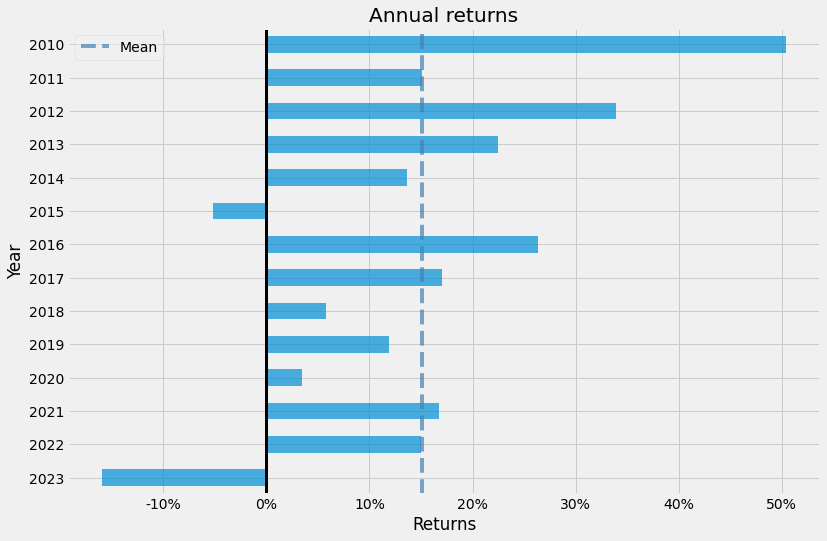

In [ ]:
pf.plot_annual_returns(df1['Strategy'])


<AxesSubplot:title={'center':'Distribution of monthly returns'}, xlabel='Returns', ylabel='Number of months'>

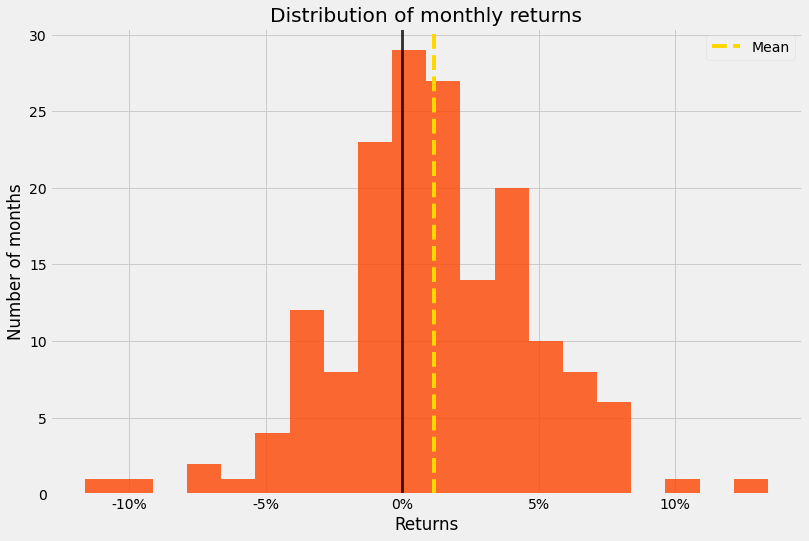

In [ ]:
pf.plot_monthly_returns_dist(df1['Strategy'])

In [ ]:
df1['crossSignal1'] = np.where(df1.ta.ema(length=10)>df1.ta.ema(length=5),1,0)